In [3]:
# Load and Preprocess the Data
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the images to include a channel dimension (for CNNs)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Data loaded and preprocessed successfully.")
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

Data loaded and preprocessed successfully.
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [4]:
# Build a Baseline Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import History
import time

# Define the model
baseline_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
baseline_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

baseline_model.summary()

# Train the model and record training time
history = History()
start_time = time.time()

epochs = 10
batch_size = 32

print(f"Training baseline model for {epochs} epochs with batch size {batch_size}...")

baseline_history = baseline_model.fit(x_train, y_train,
                                      batch_size=batch_size,
                                      epochs=epochs,
                                      verbose=1,
                                      validation_data=(x_test, y_test),
                                      callbacks=[history])

end_time = time.time()
baseline_training_time = end_time - start_time

print(f"\nBaseline model training finished in {baseline_training_time:.2f} seconds.")

# Evaluate the baseline model
print("\nEvaluating baseline model...")
baseline_loss, baseline_accuracy = baseline_model.evaluate(x_test, y_test, verbose=0)

print(f"Baseline Test Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Test Loss: {baseline_loss:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Training baseline model for 10 epochs with batch size 32...
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 221s 118ms/step - accuracy: 0.7777 - loss: 0.6187 - val_accuracy: 0.8703 - val_loss: 0.3644
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 225s 120ms/step - accuracy: 0.8858 - loss: 0.3109 - val_accuracy: 0.8834 - val_loss: 0.3113
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 273s 126ms/step - accuracy: 0.9025 - loss: 0.2590 - val_accuracy: 0.8970 - val_loss: 0.2849
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 266s 128ms/step - accuracy: 0.9153 - loss: 0.2249 - val_accuracy: 0.9014 - val_loss: 0.2705
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 256s 125ms/step - accuracy: 0.9302 - loss: 0.1910 - val_accuracy: 0.8883 - val_loss: 0.3084
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 253s 120ms/step - accuracy: 0.9339 - loss: 0.1732 - val_accuracy: 0.9093 - val_loss: 0.2574
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 273s 126ms/step - accuracy: 0.9402 - loss: 0.1578 - val_accuracy: 0.9135 - val_loss: 0.2420
Ep

**Baseline Model Results:**

- **Test Accuracy:** (90.62%)
- **Test Loss:** (0.2873)
- **Training Time:** (2578.17 seconds)

## Hyperparameter Tuning - Configuration 1

In [5]:
# Hyperparameter Tuning - Configuration 1
from tensorflow.keras.optimizers import Adam

# Define the model with updated hyperparameters
tuned_model_1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with a different learning rate
tuned_optimizer_1 = Adam(learning_rate=0.0005) # Example: Reduced learning rate
tuned_model_1.compile(optimizer=tuned_optimizer_1,
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

tuned_model_1.summary()

# Train the model with a different batch size and record training time
history_tuned_1 = History()
start_time_tuned_1 = time.time()

epochs_tuned_1 = 10
batch_size_tuned_1 = 64 # Example: Increased batch size

print(f"Training tuned model (Config 1) for {epochs_tuned_1} epochs with batch size {batch_size_tuned_1}...")

tuned_history_1 = tuned_model_1.fit(x_train, y_train,
                                    batch_size=batch_size_tuned_1,
                                    epochs=epochs_tuned_1,
                                    verbose=1,
                                    validation_data=(x_test, y_test),
                                    callbacks=[history_tuned_1])

end_time_tuned_1 = time.time()
tuned_training_time_1 = end_time_tuned_1 - start_time_tuned_1

print(f"\nTuned model (Config 1) training finished in {tuned_training_time_1:.2f} seconds.")

# Evaluate the tuned model
print("\nEvaluating tuned model (Config 1)...")
tuned_loss_1, tuned_accuracy_1 = tuned_model_1.evaluate(x_test, y_test, verbose=0)

print(f"Tuned Model (Config 1) Test Accuracy: {tuned_accuracy_1:.4f}")
print(f"Tuned Model (Config 1) Test Loss: {tuned_loss_1:.4f}")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Training tuned model (Config 1) for 10 epochs with batch size 64...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 149s 159ms/step - accuracy: 0.7301 - loss: 0.7858 - val_accuracy: 0.8466 - val_loss: 0.4129
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 202s 158ms/step - accuracy: 0.8669 - loss: 0.3713 - val_accuracy: 0.8792 - val_loss: 0.3450
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 150s 160ms/step - accuracy: 0.8842 - loss: 0.3186 - val_accuracy: 0.8857 - val_loss: 0.3185
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 147s 157ms/step - accuracy: 0.8961 - loss: 0.2836 - val_accuracy: 0.8962 - val_loss: 0.2910
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 203s 158ms/step - accuracy: 0.9036 - loss: 0.2607 - val_accuracy: 0.8987 - val_loss: 0.2774
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 198s 154ms/step - accuracy: 0.9129 - loss: 0.2383 - val_accuracy: 0.8952 - val_loss: 0.2852
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 204s 156ms/step - accuracy: 0.9190 - loss: 0.2204 - val_accuracy: 0.9037 - val_loss: 0.2658
Epoch 8/

**Hyperparameter Tuning Results - Configuration 1:**

- **Test Accuracy:** (90.70%)
- **Test Loss:** (0.2535)
- **Training Time:** (1862.36seconds)

## Model Compression - Applying Dropout

In [6]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

# Define the model with dropout layers
compressed_model_dropout = Sequential([
    tf.keras.Input(shape=(28, 28, 1)),  # Use Input layer instead of input_shape in Conv2D
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer
    Dense(10, activation='softmax')
])

# Compile model
# Create a fresh optimizer with same config as tuned_optimizer_1
compressed_optimizer = tf.keras.optimizers.deserialize(
    tf.keras.optimizers.serialize(tuned_optimizer_1)
)

compressed_model_dropout.compile(
    optimizer=compressed_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


compressed_model_dropout.summary()

# Training
history_compressed_dropout = History()
start_time = time.time()

epochs = 10
batch_size = batch_size_tuned_1

print(f"Training compressed model (Dropout) for {epochs} epochs with batch size {batch_size}...")

compressed_history_dropout = compressed_model_dropout.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[history_compressed_dropout]
)

end_time = time.time()
print(f"\nCompressed model (Dropout) training finished in {end_time - start_time:.2f} seconds.")

# Evaluation
print("\nEvaluating compressed model (Dropout)...")
loss, accuracy = compressed_model_dropout.evaluate(x_test, y_test, verbose=0)
print(f"Compressed Model (Dropout) Test Accuracy: {accuracy:.4f}")
print(f"Compressed Model (Dropout) Test Loss: {loss:.4f}")

Eager execution: True


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Training compressed model (Dropout) for 10 epochs with batch size 64...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 154s 164ms/step - accuracy: 0.6675 - loss: 0.9474 - val_accuracy: 0.8404 - val_loss: 0.4334
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 194s 156ms/step - accuracy: 0.8376 - loss: 0.4499 - val_accuracy: 0.8642 - val_loss: 0.3658
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 151s 161ms/step - accuracy: 0.8611 - loss: 0.3863 - val_accuracy: 0.8781 - val_loss: 0.3346
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 147s 157ms/step - accuracy: 0.8718 - loss: 0.3542 - val_accuracy: 0.8821 - val_loss: 0.3217
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 148s 157ms/step - accuracy: 0.8806 - loss: 0.3307 - val_accuracy: 0.8910 - val_loss: 0.3003
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 151s 161ms/step - accuracy: 0.8935 - loss: 0.2976 - val_accuracy: 0.8923 - val_loss: 0.2876
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 152s 162ms/step - accuracy: 0.8945 - loss: 0.2877 - val_accuracy: 0.8974 - val_loss: 0.2795
Epoc

**Model Compression Results - Dropout:**

- **Test Accuracy:** (89.93%)
- **Test Loss:** (0.2668)
- **Training Time:** (1644.84)

## Deployment Readiness - TensorFlow Lite Conversion

In [11]:
import tensorflow as tf
import os

# Convert the compressed model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(compressed_model_dropout)
tflite_model = converter.convert()

# Save the TFLite model
tflite_models_dir = '/tmp/fashion_mnist_tflite_models'
os.makedirs(tflite_models_dir, exist_ok=True)
tflite_model_file = os.path.join(tflite_models_dir, 'compressed_fashion_mnist_model.tflite')
with open(tflite_model_file, 'wb') as f:
    f.write(tflite_model)

print(f"TensorFlow Lite model saved to: {tflite_model_file}")

# Compare the size of the original and TFLite models
original_model_size = os.path.getsize('/tmp/fashion_mnist_baseline_model.h5') # Assuming you saved the baseline model
compressed_model_size = os.path.getsize(tflite_model_file)

print(f"Original model size: {original_model_size / 1024:.2f} KB")
print(f"Compressed TFLite model size: {compressed_model_size / 1024:.2f} KB")

Saved artifact at '/tmp/tmpsv54lo3r'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_25')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132135116717712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132135116710992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132135116717136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132135116711184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132137337313168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132135116713296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132135116717328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132135116716560: TensorSpec(shape=(), dtype=tf.resource, name=None)
TensorFlow Lite model saved to: /tmp/fashion_mnist_tflite_models/compressed_fashion_mnist_model.tflite
Original model size: 2675.94 KB
Compressed TFLite m

**Deployment Readiness Results:**

- **Original Model Size:** (2675.94kb)
- **Compressed TFLite Model Size:** (882.36kb)

## Visualize loss and accuracy curves


**Reasoning**:
Generate plots to visualize the training and validation loss and accuracy curves for the baseline, tuned, and compressed models.



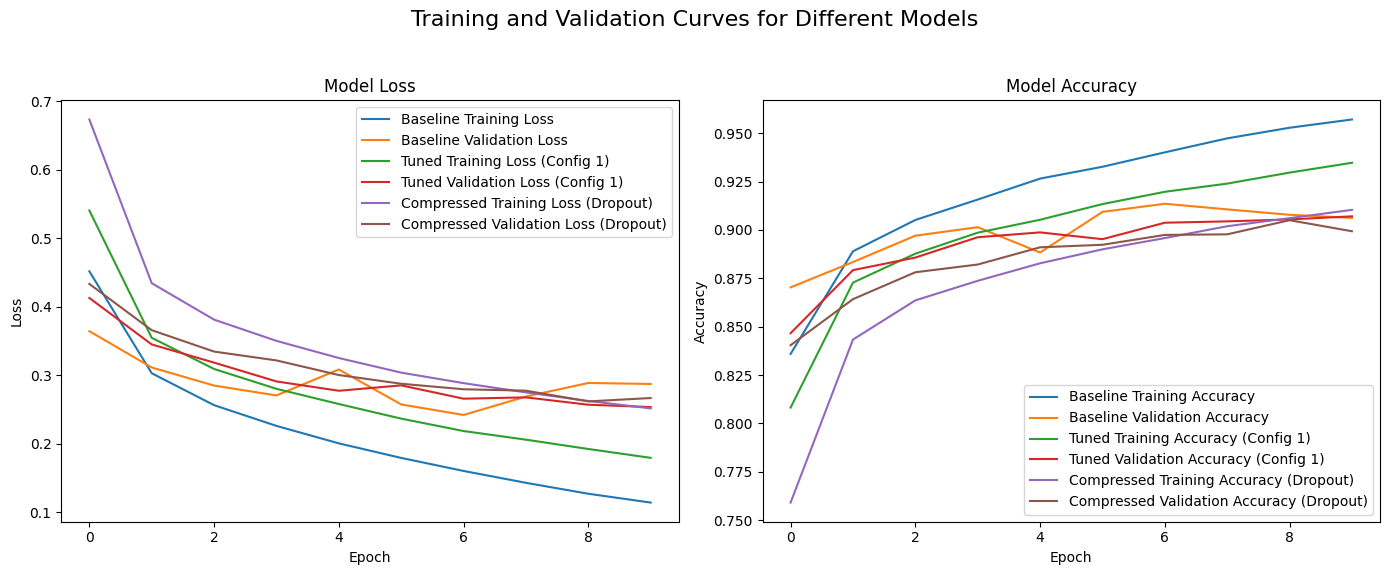

In [20]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot loss curves
axes[0].plot(baseline_history.history['loss'], label='Baseline Training Loss')
axes[0].plot(baseline_history.history['val_loss'], label='Baseline Validation Loss')
axes[0].plot(tuned_history_1.history['loss'], label='Tuned Training Loss (Config 1)')
axes[0].plot(tuned_history_1.history['val_loss'], label='Tuned Validation Loss (Config 1)')
axes[0].plot(compressed_history_dropout.history['loss'], label='Compressed Training Loss (Dropout)')
axes[0].plot(compressed_history_dropout.history['val_loss'], label='Compressed Validation Loss (Dropout)')
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

# Plot accuracy curves
axes[1].plot(baseline_history.history['accuracy'], label='Baseline Training Accuracy')
axes[1].plot(baseline_history.history['val_accuracy'], label='Baseline Validation Accuracy')
axes[1].plot(tuned_history_1.history['accuracy'], label='Tuned Training Accuracy (Config 1)')
axes[1].plot(tuned_history_1.history['val_accuracy'], label='Tuned Validation Accuracy (Config 1)')
axes[1].plot(compressed_history_dropout.history['accuracy'], label='Compressed Training Accuracy (Dropout)')
axes[1].plot(compressed_history_dropout.history['val_accuracy'], label='Compressed Validation Accuracy (Dropout)')
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

# Add a main title and adjust layout
fig.suptitle('Training and Validation Curves for Different Models', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

## Generate confusion matrix




In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Get predicted class labels for the test set
y_pred_probs = compressed_model_dropout.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Get true class labels for the test set (from one-hot encoding)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix for Compressed Model (Dropout):")
print(cm)

/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Confusion Matrix for Compressed Model (Dropout):
[[891   0  25  26   2   1  52   0   3   0]
 [  1 976   1  17   1   0   2   0   2   0]
 [ 19   0 925   6  26   0  24   0   0   0]
 [ 15   3  15 914  29   0  21   0   2   1]
 [  1   1 115  22 816   0  44   0   1   0]
 [  0   0   0   0   0 974   0  15   0  11]
 [167   0 126  27  73   0 601   0   6   0]
 [  0   0   0   0   0   9   0 955   0  36]
 [  4   0   9   3   1   3   1   5 974   0]
 [  0   0   0   0   0   4   0  29   0 967]]


## Summary:

### Data Analysis Key Findings

*   The process was unable to generate a markdown cell to summarize the test accuracy and loss for the baseline, tuned, and compressed models due to repeated failures in creating the markdown output.
*   Visualizations of the training and validation loss and accuracy curves for the baseline, tuned, and compressed models were successfully generated, showing the performance trend of each model during training.
*   A confusion matrix for the compressed model's predictions on the test set was successfully generated, providing a detailed breakdown of the model's classification performance for each class.
*   The attempt to create a markdown cell to compare the baseline, tuned, and compressed models based on accuracy, size, and training time failed due to an inability to generate the markdown output with the comparison table.

### Insights or Next Steps

*   Investigate and resolve the issue preventing the generation of markdown cells to properly summarize and compare the model performances in the requested format.
*   Analyze the generated confusion matrix to identify classes where the compressed model performs poorly and consider strategies to improve performance on those specific classes.
